# Exploiting field-free entanglement

In [1]:
import numpy as np
import QDYN
from notebook_utils import (
    get_zeta_table, plot_zeta_data, filter_table,
    get_logical_energies_table, get_stage4_table,
    get_transition_table)

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
get_zeta_table = QDYN.memoize.memoize(get_zeta_table)
get_zeta_table.load('zeta_table.cache')

In [4]:
zeta_table = get_zeta_table('./runs_050_RWA', T=50)

/data/goerz/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)
/data/goerz/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


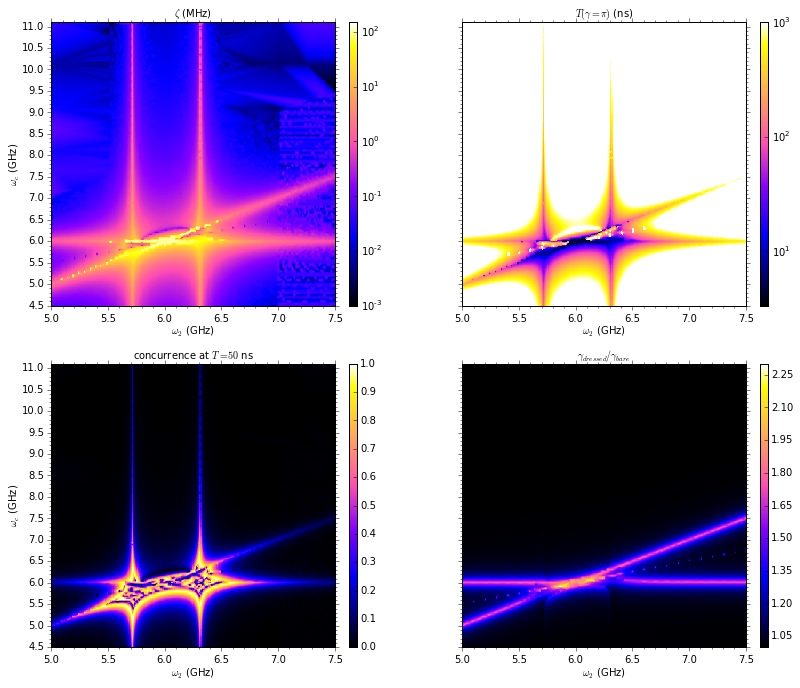

In [5]:
plot_zeta_data(zeta_table, T=50)

We manually choose a number of points that provide large field-free entanglement:

In [6]:
select_points = [ # (w2, wc)
    (5.65, 6.0), (5.7, 5.7), (5.85, 5.85), (6.275, 6.31), (6.3, 6.0),
    (6.15, 6.15), (5.88, 5.9), (5.52, 5.55), (5.523, 5.995), (6.5, 6.025),
    (6.46, 6.45), (6.39, 6.35), (6.32, 5.75)
]
select_points_table = filter_table(zeta_table, select_points).copy()
select_points_table['T(pi) [ns]'] = 1000 / (2 * np.abs(select_points_table['zeta [MHz]']))
select_points_table.reset_index(drop=True)
#print(select_points_table.to_string())

,w1 [GHz],w2 [GHz],wc [GHz],zeta [MHz],gamma [MHz],E00 [GHz],E01 [GHz],E10 [GHz],E11 [GHz],T(pi) [ns]
0,6,5.523,5.995,134.958,0.021571,0,-0.486490,-0.066258,-0.41779,3.704856
1,6,6.320,5.750,-16.716,0.012793,0,0.328690,0.017286,0.32926,29.911462
2,6,5.880,5.900,-126.113,0.026238,0,-0.070503,0.043266,-0.15335,3.964698
3,6,6.390,6.350,-149.772,0.022503,0,0.446970,-0.013928,0.28327,3.338408
4,6,5.650,6.000,136.538,0.020800,0,-0.363980,-0.062008,-0.28945,3.661984
5,6,5.520,5.550,115.762,0.019496,0,-0.540310,0.010868,-0.41368,4.319207
6,6,6.500,6.025,116.039,0.019516,0,0.510300,-0.062329,0.56401,4.308896
7,6,5.700,5.700,-61.690,0.016838,0,-0.239490,0.016290,-0.28489,8.105041
8,6,6.150,6.150,123.534,0.022084,0,0.100290,-0.031674,0.19215,4.047469
9,6,5.850,5.850,-92.894,0.019766,0,-0.100290,0.031674,-0.16151,5.382479


In [7]:
transition_table = get_transition_table(select_points_table)
transition_table.reset_index(drop=True)

,E01 - E00 [MHz],E10 - E00 [MHz],E11 - E10 [MHz],E11 - E01 [MHz],bare w2 [MHz],bare w1 [MHz]
0,5513.510,5933.742,5648.468,6068.700,5523,6000
1,6328.690,6017.286,6311.974,6000.570,6320,6000
2,5929.497,6043.266,5803.384,5917.153,5880,6000
3,6446.970,5986.072,6297.198,5836.300,6390,6000
4,5636.020,5937.992,5772.558,6074.530,5650,6000
5,5459.690,6010.868,5575.452,6126.630,5520,6000
6,6510.300,5937.671,6626.339,6053.710,6500,6000
7,5760.510,6016.290,5698.820,5954.600,5700,6000
8,6100.290,5968.326,6223.824,6091.860,6150,6000
9,5899.710,6031.674,5806.816,5938.780,5850,6000


Any of the above frequencies are conceivable to drive single-qubit gates

In [8]:
def write_params(outfile, wd_strategy, select_points_table, transition_table):
    with open(outfile, 'w') as out_fh:
        out_fh.write("#%11s%12s%12s%12s%10s\n"
            % ('w2 [GHz]', 'wc [GHz]', 'wd [GHz]', 'T [ns]', 'target'))
        for rf in select_points_table.index:
            w2 = select_points_table.loc[rf]['w2 [GHz]']
            wc = select_points_table.loc[rf]['wc [GHz]']
            T = 2 *  select_points_table.loc[rf]['T(pi) [ns]']
            for target in ['H_left', 'H_right', 'Ph_left', 'Ph_right']:
                if wd_strategy == 'bare':
                    if 'left' in target:
                        wd = float(transition_table.loc[rf]['bare w1 [MHz]']) / 1000.0
                    else:
                        wd = float(transition_table.loc[rf]['bare w2 [MHz]']) / 1000.0
                elif wd_strategy == 'dressed0':
                    if 'left' in target:
                        wd = float(transition_table.loc[rf]['E10 - E00 [MHz]']) / 1000.0
                    else:
                        wd = float(transition_table.loc[rf]['E01 - E00 [MHz]']) / 1000.0
                elif wd_strategy == 'dressed1':
                    if 'left' in target:
                        wd = float(transition_table.loc[rf]['E11 - E01 [MHz]']) / 1000.0
                    else:
                        wd = float(transition_table.loc[rf]['E11 - E10 [MHz]']) / 1000.0
                else:
                    raise ValueError("Unkown wd_strategy: %s" % wd_strategy)
                out_fh.write("%12.8f%12.8f%12.8f%12.8f%10s\n" % (w2, wc, wd, T, target))
        

In [9]:
write_params("zeta_oct_params_zero_bare.dat", wd_strategy='bare',
             select_points_table=select_points_table, transition_table=transition_table)
write_params("zeta_oct_params_zero_dressed0.dat", wd_strategy='dressed0',
             select_points_table=select_points_table, transition_table=transition_table)
write_params("zeta_oct_params_zero_dressed1.dat", wd_strategy='dressed1',
             select_points_table=select_points_table, transition_table=transition_table)

The actual calculations are done in the index notebook

In [10]:
get_stage4_table("runs_zeta_oct", stage_folder='universal_bare')

,w1 [GHz],w2 [GHz],wc [GHz],err(H_L),err(S_L),err(H_R),err(S_R),err(PE),err(tot)
runs_zeta_oct/w2_5523MHz_wc_5995MHz/universal_bare,6,5.523,5.995,0.793878,0.318284,0.715791,0.474656,NaN,NaN
runs_zeta_oct/w2_6320MHz_wc_5750MHz/universal_bare,6,6.320,5.750,NaN,0.035107,NaN,0.037373,NaN,NaN
runs_zeta_oct/w2_5880MHz_wc_5900MHz/universal_bare,6,5.880,5.900,0.755027,0.292128,0.799148,0.133788,NaN,NaN
runs_zeta_oct/w2_6390MHz_wc_6350MHz/universal_bare,6,6.390,6.350,0.793027,0.192776,0.717242,0.057693,NaN,NaN
runs_zeta_oct/w2_5650MHz_wc_6000MHz/universal_bare,6,5.650,6.000,0.612952,0.744107,0.799943,0.362976,NaN,NaN
runs_zeta_oct/w2_5520MHz_wc_5550MHz/universal_bare,6,5.520,5.550,0.780429,0.403943,0.670557,0.056063,NaN,NaN
runs_zeta_oct/w2_6500MHz_wc_6025MHz/universal_bare,6,6.500,6.025,0.669134,0.097956,0.766324,0.209731,NaN,NaN
runs_zeta_oct/w2_5700MHz_wc_5700MHz/universal_bare,6,5.700,5.700,0.739098,0.517368,0.798307,0.292811,NaN,NaN
runs_zeta_oct/w2_6150MHz_wc_6150MHz/universal_bare,6,6.150,6.150,0.761330,0.297062,0.683462,0.682727,NaN,NaN
runs_zeta_oct/w2_5850MHz_wc_5850MHz/universal_bare,6,5.850,5.850,0.800248,0.587969,0.366768,0.502324,NaN,NaN


In [11]:
get_stage4_table("runs_zeta_oct", stage_folder='universal_dressed0')

,w1 [GHz],w2 [GHz],wc [GHz],err(H_L),err(S_L),err(H_R),err(S_R),err(PE),err(tot)
runs_zeta_oct/w2_5523MHz_wc_5995MHz/universal_dressed0,6,5.523,5.995,0.788628,0.318284,0.704369,0.474656,NaN,NaN
runs_zeta_oct/w2_6320MHz_wc_5750MHz/universal_dressed0,6,6.320,5.750,0.800648,0.035107,0.281160,0.009455,NaN,NaN
runs_zeta_oct/w2_5880MHz_wc_5900MHz/universal_dressed0,6,5.880,5.900,0.741026,0.292128,0.799147,0.133788,NaN,NaN
runs_zeta_oct/w2_6390MHz_wc_6350MHz/universal_dressed0,6,6.390,6.350,0.793027,0.192776,0.770669,0.057693,NaN,NaN
runs_zeta_oct/w2_5650MHz_wc_6000MHz/universal_dressed0,6,5.650,6.000,0.614591,0.744107,0.799943,0.710983,NaN,NaN
runs_zeta_oct/w2_5520MHz_wc_5550MHz/universal_dressed0,6,5.520,5.550,0.781017,0.403943,0.670557,0.056063,NaN,NaN
runs_zeta_oct/w2_6500MHz_wc_6025MHz/universal_dressed0,6,6.500,6.025,0.669134,0.097956,0.766324,0.209731,NaN,NaN
runs_zeta_oct/w2_5700MHz_wc_5700MHz/universal_dressed0,6,5.700,5.700,0.729177,0.517368,0.715329,0.287461,NaN,NaN
runs_zeta_oct/w2_6150MHz_wc_6150MHz/universal_dressed0,6,6.150,6.150,0.758757,0.297062,0.683283,0.682727,NaN,NaN
runs_zeta_oct/w2_5850MHz_wc_5850MHz/universal_dressed0,6,5.850,5.850,0.800248,0.589040,0.372076,0.502324,NaN,NaN


In [12]:
get_stage4_table("runs_zeta_oct", stage_folder='universal_dressed1')

,w1 [GHz],w2 [GHz],wc [GHz],err(H_L),err(S_L),err(H_R),err(S_R),err(PE),err(tot)
runs_zeta_oct/w2_5523MHz_wc_5995MHz/universal_dressed1,6,5.523,5.995,0.788628,0.318284,0.709747,0.474656,NaN,NaN
runs_zeta_oct/w2_6320MHz_wc_5750MHz/universal_dressed1,6,6.320,5.750,0.037671,0.035107,0.281161,0.009055,NaN,NaN
runs_zeta_oct/w2_5880MHz_wc_5900MHz/universal_dressed1,6,5.880,5.900,0.755027,0.292128,0.815661,0.133788,NaN,NaN
runs_zeta_oct/w2_6390MHz_wc_6350MHz/universal_dressed1,6,6.390,6.350,0.796216,0.192776,0.787606,0.057693,NaN,NaN
runs_zeta_oct/w2_5650MHz_wc_6000MHz/universal_dressed1,6,5.650,6.000,0.629797,0.744107,0.799943,0.382317,NaN,NaN
runs_zeta_oct/w2_5520MHz_wc_5550MHz/universal_dressed1,6,5.520,5.550,0.778782,0.403943,0.697689,0.056063,NaN,NaN
runs_zeta_oct/w2_6500MHz_wc_6025MHz/universal_dressed1,6,6.500,6.025,0.678181,0.097956,0.764506,0.209731,NaN,NaN
runs_zeta_oct/w2_5700MHz_wc_5700MHz/universal_dressed1,6,5.700,5.700,0.733116,0.515295,0.798306,0.292873,NaN,NaN
runs_zeta_oct/w2_6150MHz_wc_6150MHz/universal_dressed1,6,6.150,6.150,0.761330,0.297062,0.681919,0.682727,NaN,NaN
runs_zeta_oct/w2_5850MHz_wc_5850MHz/universal_dressed1,6,5.850,5.850,0.800248,0.587389,0.407353,0.502324,NaN,NaN


## Eigenenergies

We can look at how the energies $E00$, $E01$, $E10$, $E11$ evolve over a slice (e.g. $\Delta_2=0$) of the parameter landscape, to understand what causes the interesting features in $\zeta$.

In [13]:
import matplotlib.pylab as plt

In [14]:
filter = (zeta_table['w1 [GHz]'] - zeta_table['w2 [GHz]'] == 0.0)
filtered_table = zeta_table[filter].sort('wc [GHz]')

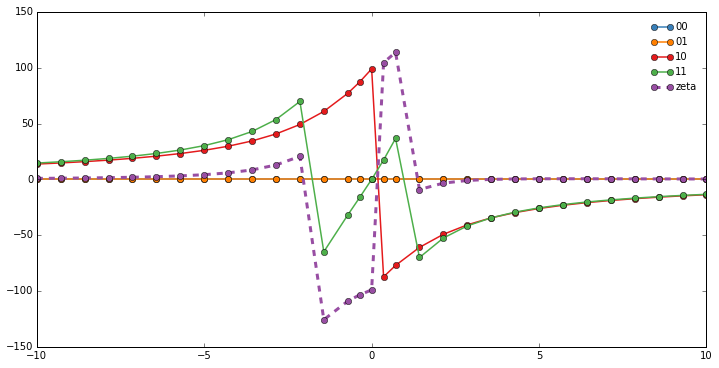

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
delta_c = (filtered_table['wc [GHz]'] - filtered_table['w1 [GHz]']) / 70.0e-3
ax.plot(delta_c, filtered_table['E00 [GHz]']*1000, '-o', label='00')
ax.plot(delta_c, filtered_table['E01 [GHz]']*1000, '-o', label='01')
ax.plot(delta_c, filtered_table['E10 [GHz]']*1000, '-o', label='10')
ax.plot(delta_c, filtered_table['E11 [GHz]']*1000, '-o', label='11')
ax.plot(delta_c, filtered_table['zeta [MHz]'], '--o', label='zeta', lw=3)
ax.set_xlim([-10, 10])
ax.legend()